# RBF neural net

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cpg model parameters
MI = 0.02
b1 = 0.01
b2 = 0.01
w11 = 1.4
w12 = 0.18 + MI
w21 = -0.18 - MI
w22 = 1.4
o1 = 0.01
o2 = 0.01
# W = [[w11,w21],[w12,w22]]
# O = [o1, o2]

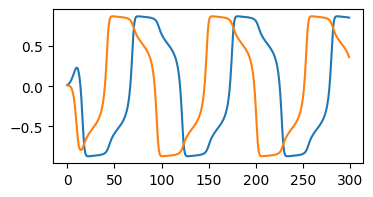

In [4]:
# cpg running
cpg_out = []
for i in range(300):
    o1 = tanh(o1*w11 + o2*w12 )
    o2 = tanh(o2*w22 + o1*w21 )
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

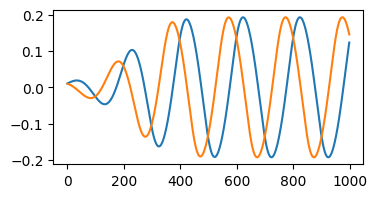

In [5]:
# SO2 oscillator from paper
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
for i in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

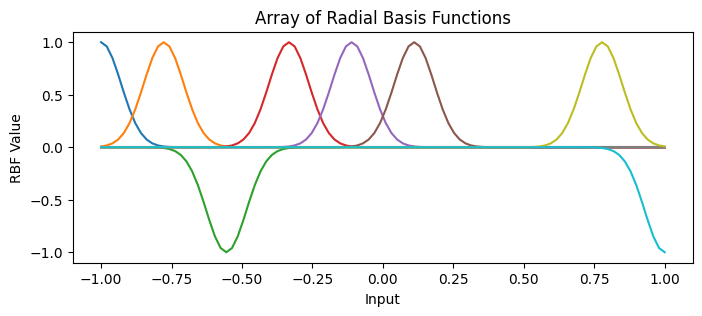

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rbf_array(input_range, num_basis, centers, widths, weights):
    """
    Generates an array of Radial Basis Functions (RBFs) over a given input range.

    Args:
        input_range (tuple): Range of the input values (e.g., (0, 1)).
        num_basis (int): Number of basis functions.
        centers (ndarray): Array of centers for the basis functions.
        widths (ndarray): Array of widths for the basis functions.

    Returns:
        ndarray: Array of RBFs evaluated over the input range.
    """
    x = np.linspace(input_range[0], input_range[1], num=100)
    rbf_array = np.zeros((num_basis, len(x)))

    for i in range(num_basis):
        rbf_array[i] = weights[i]*np.exp(-widths[i] * (x - centers[i]) ** 2)

    return rbf_array

# Example usage
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
weights = np.random.randint(input_range[0], input_range[1]+1, 10,)

rbf_array = generate_rbf_array(input_range, num_basis, centers, widths, weights)

# Plotting the RBFs
plt.figure(figsize=(8, 3))
for i in range(num_basis):
    plt.plot(np.linspace(input_range[0], input_range[1], num=100), rbf_array[i], label=f'RBF {i+1}')
plt.xlabel('Input')
plt.ylabel('RBF Value')
plt.title('Array of Radial Basis Functions')
# plt.legend()
plt.show()

In [7]:
weights

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [18]:
# cycle checker
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
rbf_array = np.zeros((num_basis, len(x)))
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

for step in range(600):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    # phase = counter/T_step
    # print(t)
    # phase_array.append(phase)
    # cpg_out.append(o1)
    # counter += 1
    if o1_p < 0 and o1 > 0:
        T_step = counter
        print('T_step', T_step)
        print(T_step)
        print(o1_p, o1)
        print('cpg_out: ', len(cpg_out))
        print('phase_array: ', len(phase_array))
        # print('x: ', x)
        # RBF function
        rbf_array = np.zeros((num_basis, T_step))
        print('rbf_array: ', rbf_array.shape)
        for i in range(num_basis):
            rbf_array[i] = np.exp(-widths[i] * (phase_array - centers[i]) ** 2)
        counter = 0
        # Plotting the RBFs
        # plt.figure(figsize=(8, 3))
        # for i in range(num_basis):
        #     plt.plot(np.linspace(input_range[0], input_range[1], num=len(phase_array)), rbf_array[i], label=f'RBF {i+1}')
        # plt.plot(phase_array, np.sum(rbf_array, axis=0))
        # plt.plot(phase_array, cpg_out)
        # plt.xlabel('Input')
        # plt.ylabel('RBF Value')
        # plt.title('Array of Radial Basis Functions')
        # # plt.legend()
        # plt.show()
        cpg_out = []
        phase_array = []
    o1_p = o1


T_step 201
201
-0.002037866758872288 0.004020559159657686
cpg_out:  201
phase_array:  201
rbf_array:  (10, 201)
T_step 201
201
-0.004769327652237066 0.0012807960533901212
cpg_out:  201
phase_array:  201
rbf_array:  (10, 201)


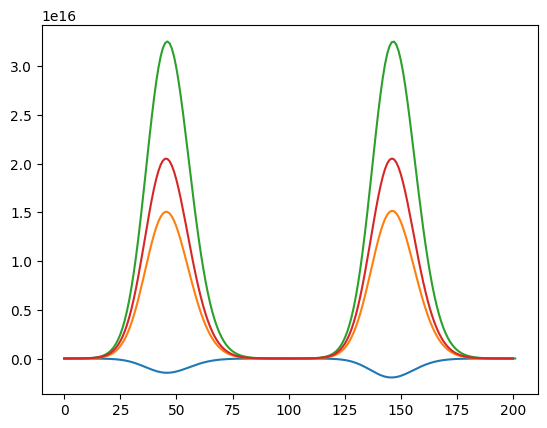

In [89]:
# RBF network re-produce paper
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 20
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
# widths = np.ones(num_basis) * 100
variance = 1/0.04
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
# weights = np.random.randint(input_range[0], input_range[1]+1, num_basis,)
weights = np.random.randn(num_basis, 1)

# rbf_array = np.zeros((num_basis, len(x)))
rbf_array = []
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

for step in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

    # print('o1', o1)
    rbf_array.append(np.sum(weights*np.exp(variance*(o1 - centers) ** 2)))
    
    if o1_p < 0 and o1 > 0:
        counter = 0
        plt.plot(rbf_array)
        rbf_array = []
        weights = np.random.randn(num_basis, 1)
        # print('weights: ', weights)
    o1_p = o1


In [55]:
weights

array([ 0,  0, -1,  0, -1, -1, -1,  0, -1,  1])